<h1>Assignment - 4 - Exploratory Data Analysis ( Air Pollution in India Dataset )</h1>

    



<h2>Registration id - SIRSS2292</h2>

<h3>Name - Mahesh Deshmukh</h3>

Air pollution in India is a serious issue. There are involve many factors. In this dataset, we will be studying these factors.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the air pollution in india dataset
df = pd.read_csv('air_pollution_india.csv',encoding = "ISO-8859-1")

C:\Users\91950\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# data frame
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape

(435742, 13)

In [5]:
# summary of data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In that dataset, 8 columns are categorical(object) types and 5 columns are numerical types.

In [6]:
# brief statistical information
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [7]:
 df.describe(include=object)

,stn_code,sampling_date,state,location,agency,type,location_monitoring_station,date
count,291665.0,435739,435742,435739,286261,430349,408251,435735
unique,803.0,5485,37,304,64,10,991,5067
top,193.0,19-03-15,Maharashtra,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",Regional Office,2015-03-19
freq,1428.0,253,60384,9984,27857,179014,6261,253


## Data Cleaning

In [8]:
# Deal with duplicate data
df.duplicated().sum()

674

In this dataset, 674 are present duplicate data. So simply we can drop this from the data frame.

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# Deal with missing values
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34632
no2                             16222
rspm                            40035
spm                            236908
location_monitoring_station     27303
pm2_5                          425754
date                                7
dtype: int64

In [12]:
missing_columns = df.isnull().columns

In [13]:
# Percentage of missing data
j = 0
for i in df.isnull().sum():
    percentage = i / 435742 * 100
    print(f'the {missing_columns[j]} has missing {percentage}% data')
    j=j+1

the stn_code has missing 33.06474932414135% data
the sampling_date has missing 0.0006884807982705363% data
the state has missing 0.0% data
the location has missing 0.0006884807982705363% data
the agency has missing 34.30149033143466% data
the type has missing 1.2293972121117542% data
the so2 has missing 7.94782233523507% data
the no2 has missing 3.722845169848213% data
the rspm has missing 9.187776252920306% data
the spm has missing 54.368869652225406% data
the location_monitoring_station has missing 6.26586374506015% data
the pm2_5 has missing 97.70781792895797% data
the date has missing 0.0016064551959645847% data


Above observation, stn_code, agency, and spm pm2_5 have a lot of data missing. Therefore, we should drop these columns

In [14]:
drop_col = ['stn_code','agency','spm','pm2_5']
for i in drop_col:
    df.drop(labels=i,axis=1,inplace=True)

In [15]:
df.isnull().sum()

sampling_date                      3
state                              0
location                           3
type                            5357
so2                            34632
no2                            16222
rspm                           40035
location_monitoring_station    27303
date                               7
dtype: int64

In [16]:
# here no need column of sampling date
df.drop(labels='sampling_date',axis=1,inplace=True)

In [17]:
# deal with missing values of categorical data
miss_cat_col = ['location', 'type','location_monitoring_station','date' ]
for a in miss_cat_col:
    freq = df[a].mode()[0]
    df[a] = df[a].fillna(freq)
    

In [18]:
# deal with missing values of numerical data
miss_num_col = ['so2','no2','rspm']
for num in miss_num_col:
    avg = df[num].mean()
    df[num].replace(np.nan, avg,inplace=True)

In [19]:
df.isnull().sum()

state                          0
location                       0
type                           0
so2                            0
no2                            0
rspm                           0
location_monitoring_station    0
date                           0
dtype: int64

At this position, all data has been cleaned.

In [20]:
df.shape

(435068, 8)

In [21]:
df.head()

,state,location,type,so2,no2,rspm,location_monitoring_station,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.871711,Regional Office,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.871711,Regional Office,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.871711,Regional Office,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.871711,Regional Office,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.871711,Regional Office,1990-03-01


Here so2 means Sulphur dioxide, no2 means Nitrogen dioxide present in the air. also rspm means Respirable Suspended Particulate Matter in air.

## Data Visualization

array([[<AxesSubplot:title={'center':'so2'}>,
        <AxesSubplot:title={'center':'no2'}>],
       [<AxesSubplot:title={'center':'rspm'}>, <AxesSubplot:>]],
      dtype=object)

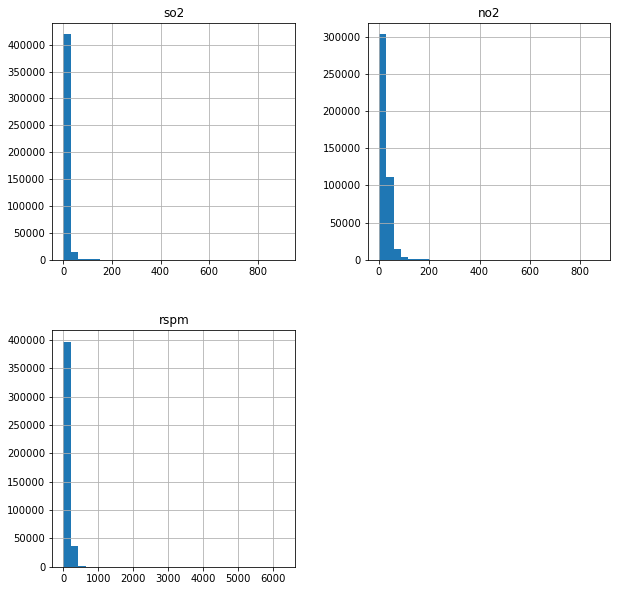

In [22]:
df.hist(bins=30,figsize=(10,10))

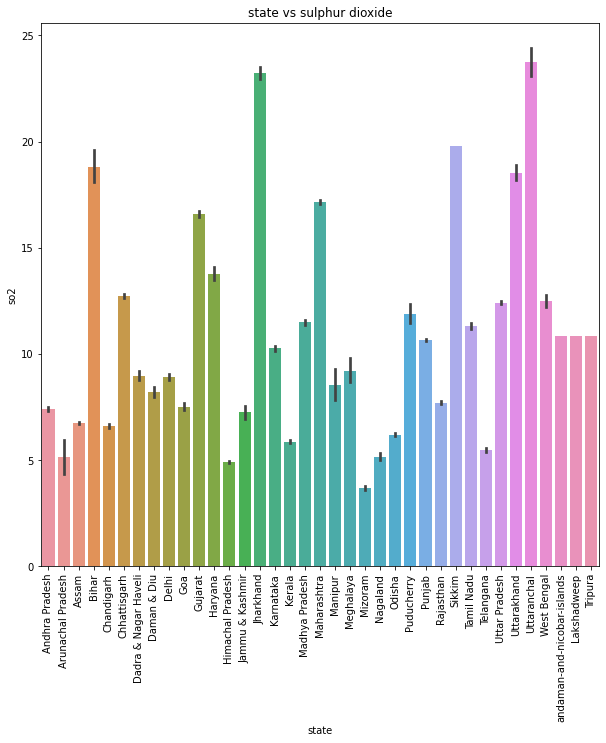

In [23]:
# states vs sulphur dioxide gas.
plt.figure(figsize= (10,10))
sns.barplot(x=df['state'],y=df['so2'],data=df)
plt.xticks(rotation = 90)
plt.title('state vs sulphur dioxide')
plt.show()

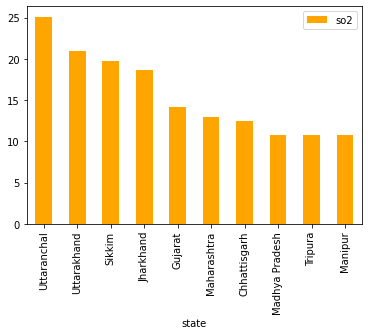

In [24]:
# top 10 states 
top = df[['so2','state']].groupby(['state']).median().sort_values(by='so2',ascending=False).head(10)
top.plot.bar(color='orange')
plt.show()

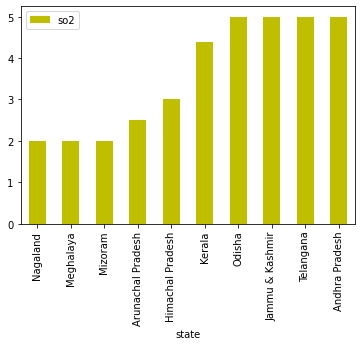

In [25]:
# bottom 10 state
bottom = df[['so2','state']].groupby(["state"]).median().sort_values(by='so2',ascending=True).head(10)
bottom.plot.bar(color='y')
plt.show()

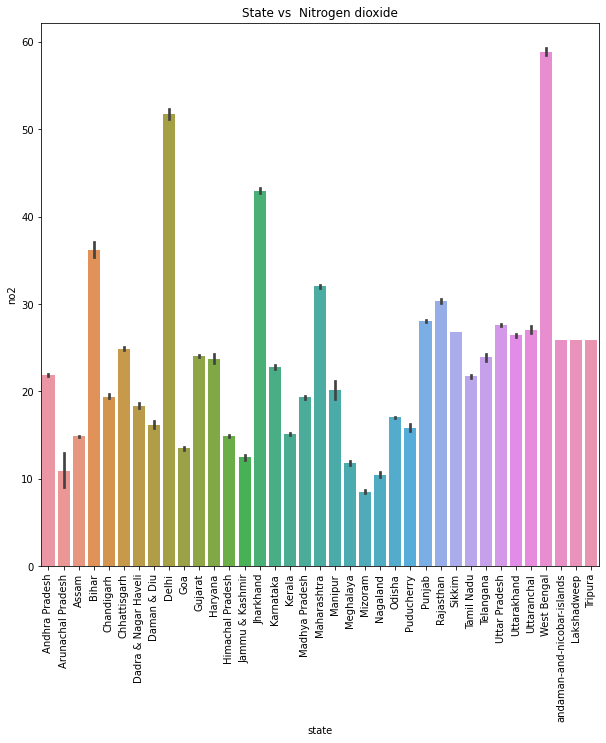

In [26]:
# states vs no2
plt.figure(figsize= (10,10))
sns.barplot(x=df['state'],y=df['no2'],data=df)
plt.title('State vs  Nitrogen dioxide')
plt.xticks(rotation = 90)
plt.show()

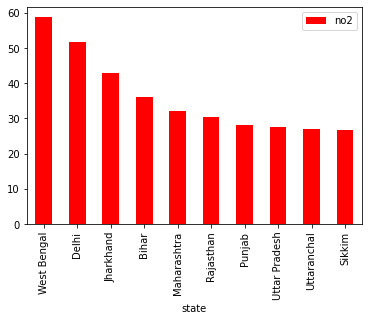

In [27]:
# top 10 states
top = df[['state','no2']].groupby(['state']).mean().sort_values(by='no2',ascending=False).head(10)
top.plot.bar(color='r')
plt.show()

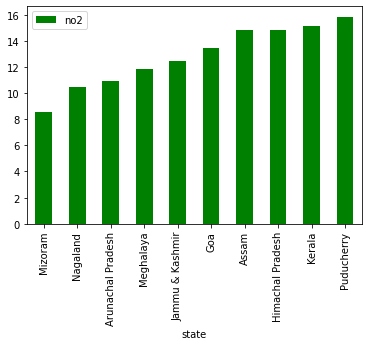

In [28]:
# bottom 10 states
bottom = df[['state','no2']].groupby(['state']).mean().sort_values(by=['no2'],ascending=True).head(10)
bottom.plot.bar(color='g')
plt.show()

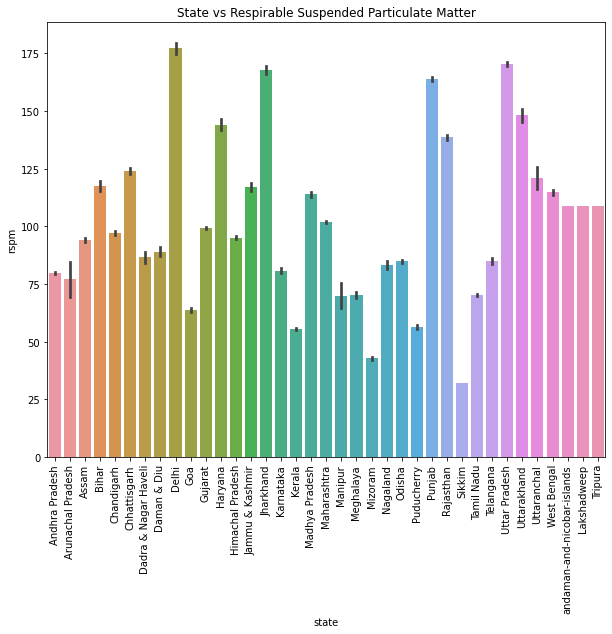

In [29]:
# state vs rspm
plt.figure(figsize=(10,8))
sns.barplot(x=df['state'],y=df['rspm'],data=df)
plt.xticks(rotation=90)
plt.title('State vs Respirable Suspended Particulate Matter')
plt.show()

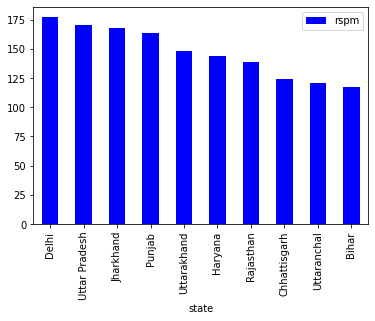

In [30]:
# Top 10 states
top = df[['state','rspm']].groupby(['state']).mean().sort_values(by='rspm',ascending=False).head(10)
top.plot.bar(color='b')
plt.show()

<AxesSubplot:xlabel='state'>

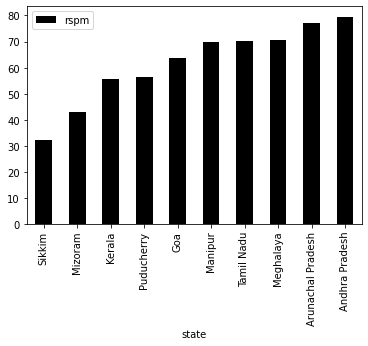

In [31]:
# bottom 10 states
bottom = df[['state','rspm']].groupby(['state']).mean().sort_values(by='rspm',ascending=True).head(10)
bottom.plot.bar(color='k')

<AxesSubplot:xlabel='location', ylabel='so2'>

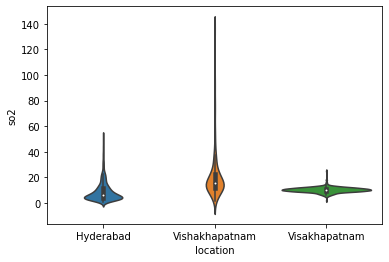

In [32]:
sns.violinplot(x=df['location'].iloc[:2000,],y=df['so2'],data=df)

In [33]:
# Find the relation between columns. 
df.corr()

,so2,no2,rspm
so2,1.000000,0.331957,0.141341
no2,0.331957,1.000000,0.339582
rspm,0.141341,0.339582,1.000000


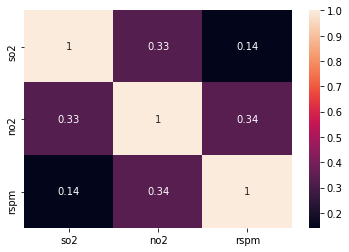

In [34]:
sns.heatmap(df.corr(),annot=True)
plt.show()